# 1. Training Dynamics
Both MLP and LSTM models show mild overfitting. In both cases, the training loss continues decreasing whereas the validation loss stays nearly constant or increases slightly after around 30 epochs. In addition, the training F1 macro score increases steadily wheareas the validation F1 score tends to stablize.

To address the overfitting, we can increase the droupout value, use greater weight decay, and use earlier stopping based on the best validation F1. 

The imbalanced datasets misclassify minority classes as the neutral class is more frequent than the negative and positive classes. Class weights can improve model performance by assigning higher weights to negative and positive classes. Though it can produce more balanced F1 score through more recall for minority classes, the accuracy and training stability decrease.

# 2. Model Performance and Error Analysis
I used different hyperparameters and initializations in these two models. LSTM model is generalized better. From metrics, LSTM has a F1 macro score 0.7220, whereas MLP has a F1 macro score 0.7061. 

The positive class was the most frequently misclassfied: MLP(0.6311), LSTM(0.6194). In both models, the positive class has the lowest F1 score. Since the dataset is imbalanced, the neutral class is the most frequent in both models, so the models tend to favor the neutral class. In addition, it is harder to identify patterns in positive class compared to negative class in financial statement, so the positive class performs worse than the negative class. 

# 3. Cross-Model Comparison

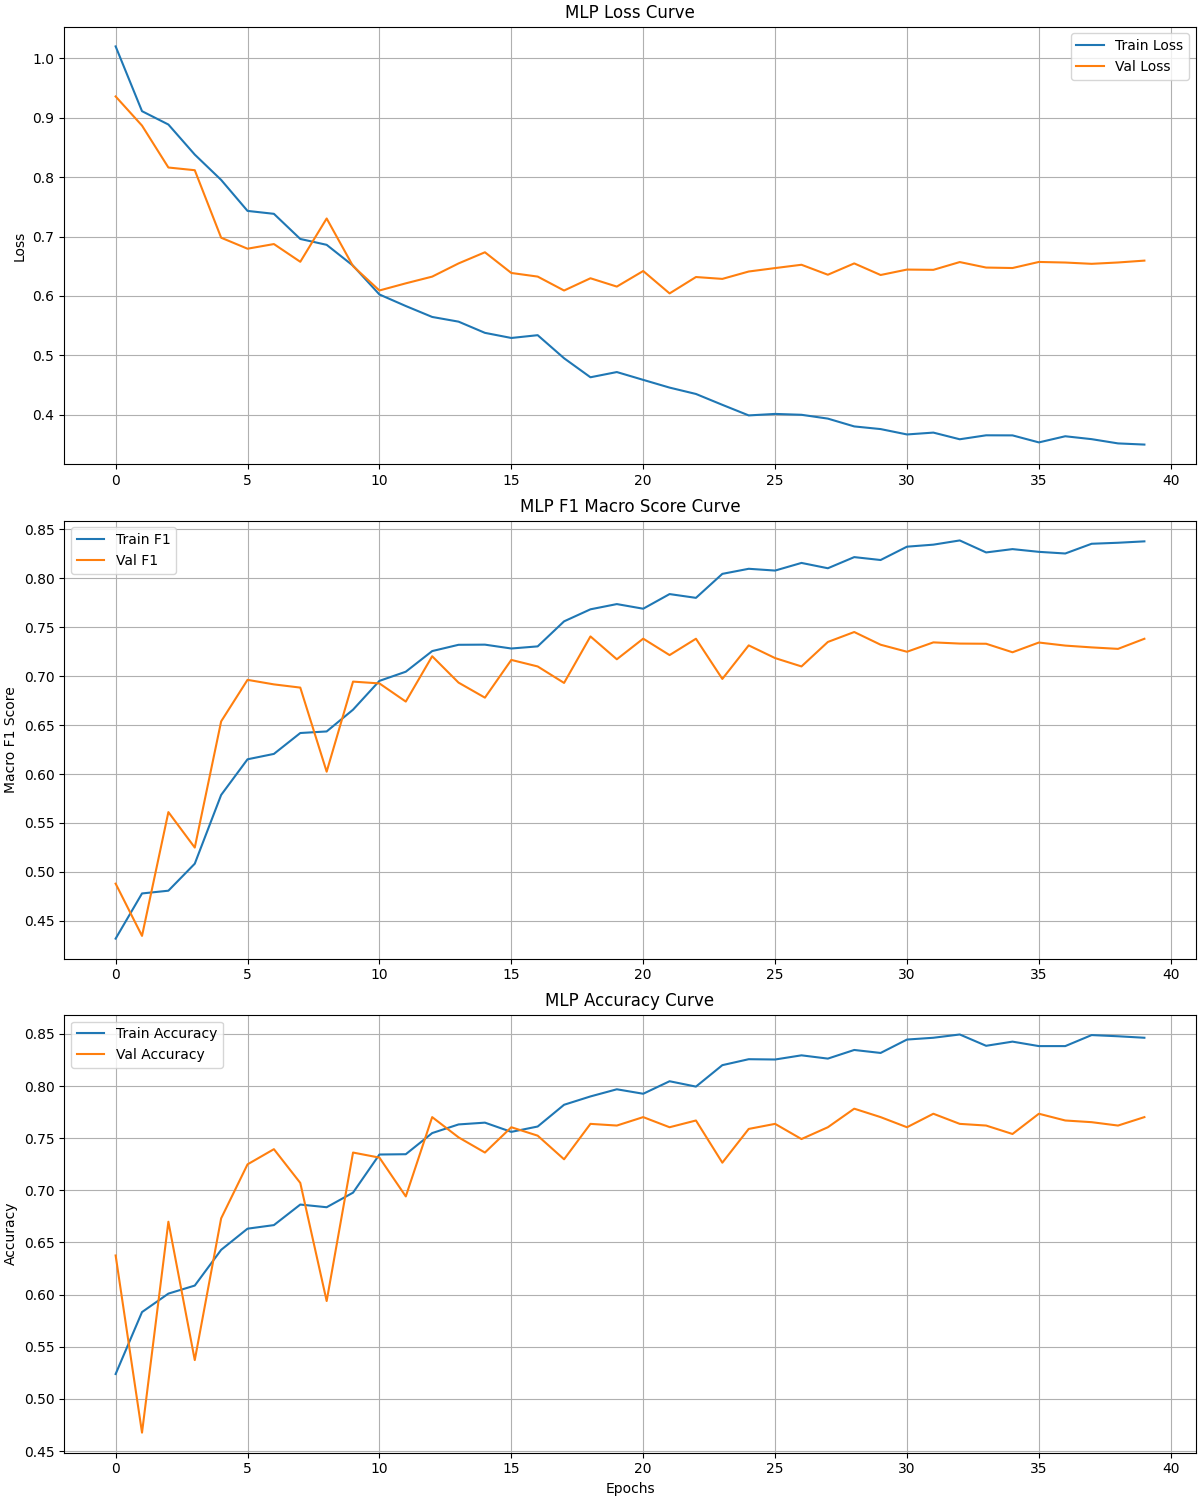

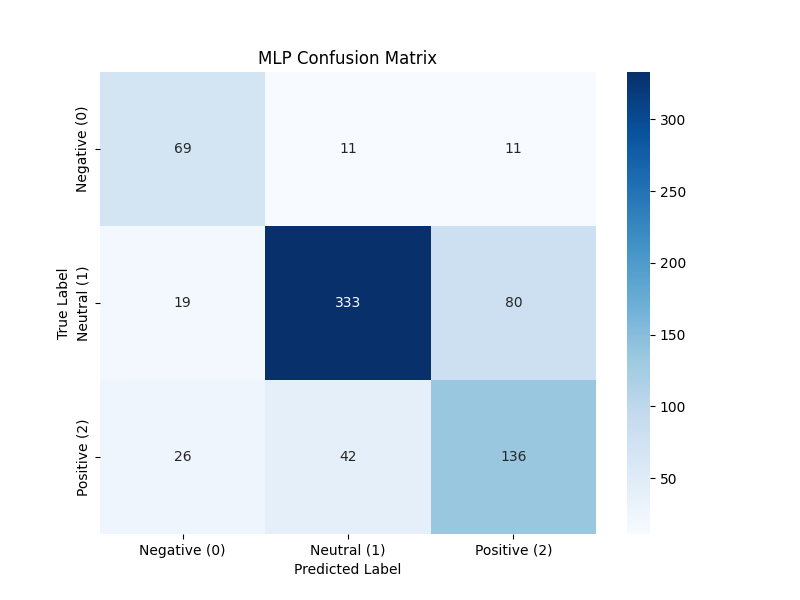

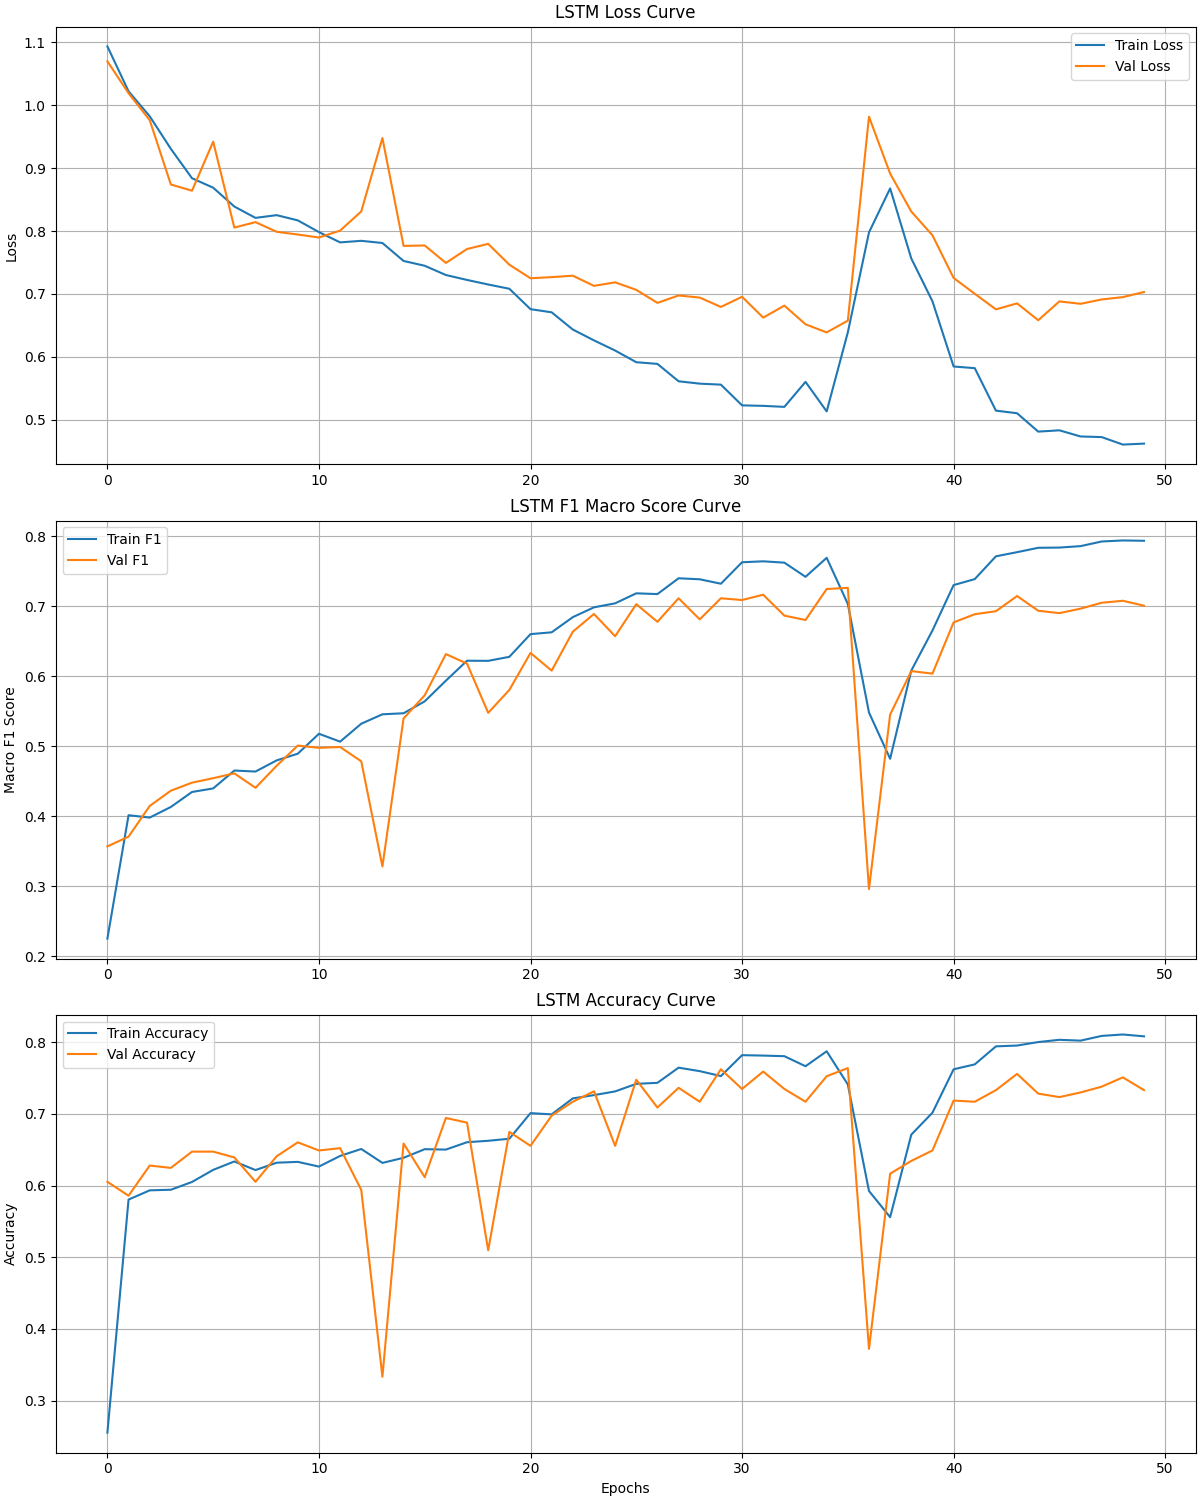

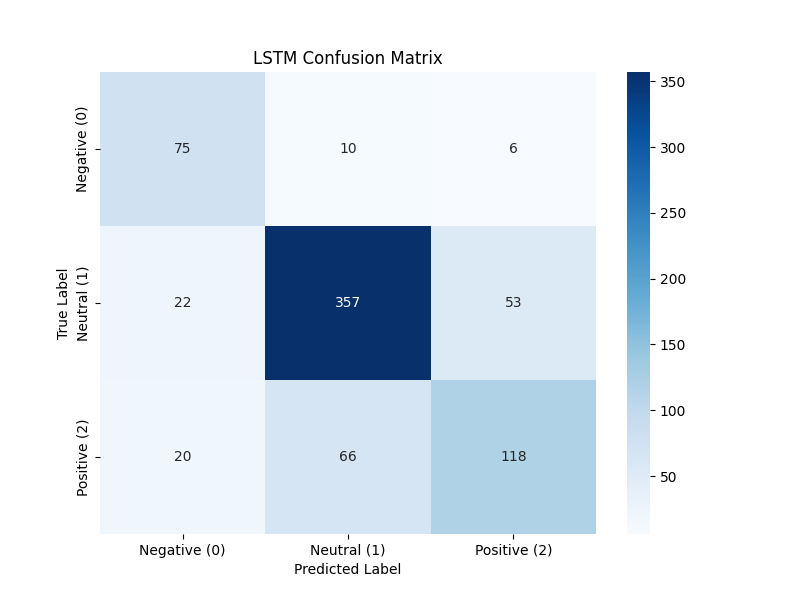

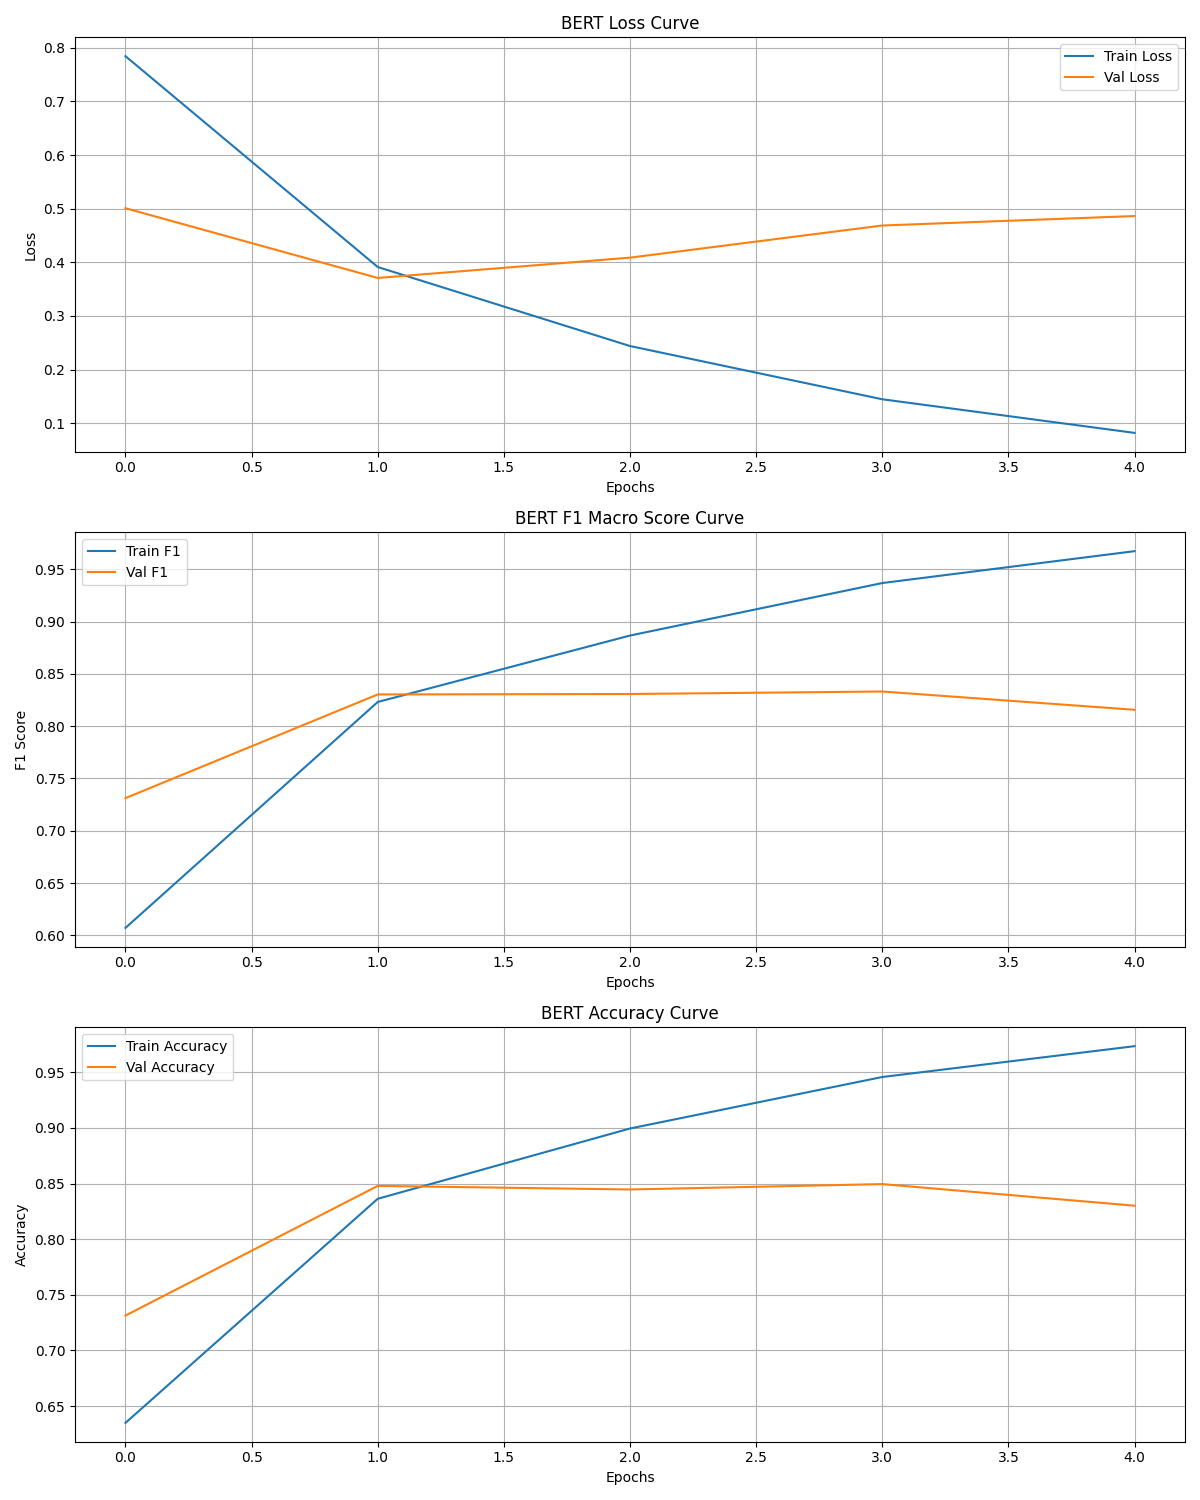

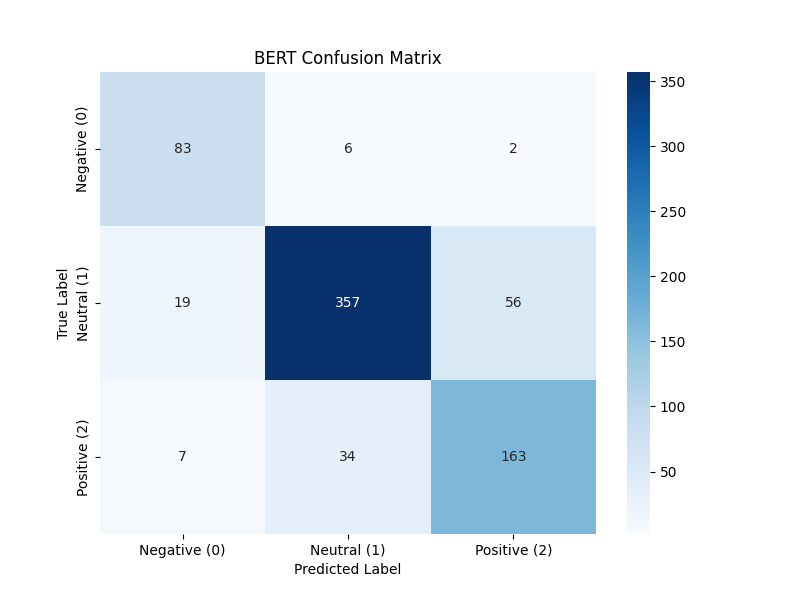

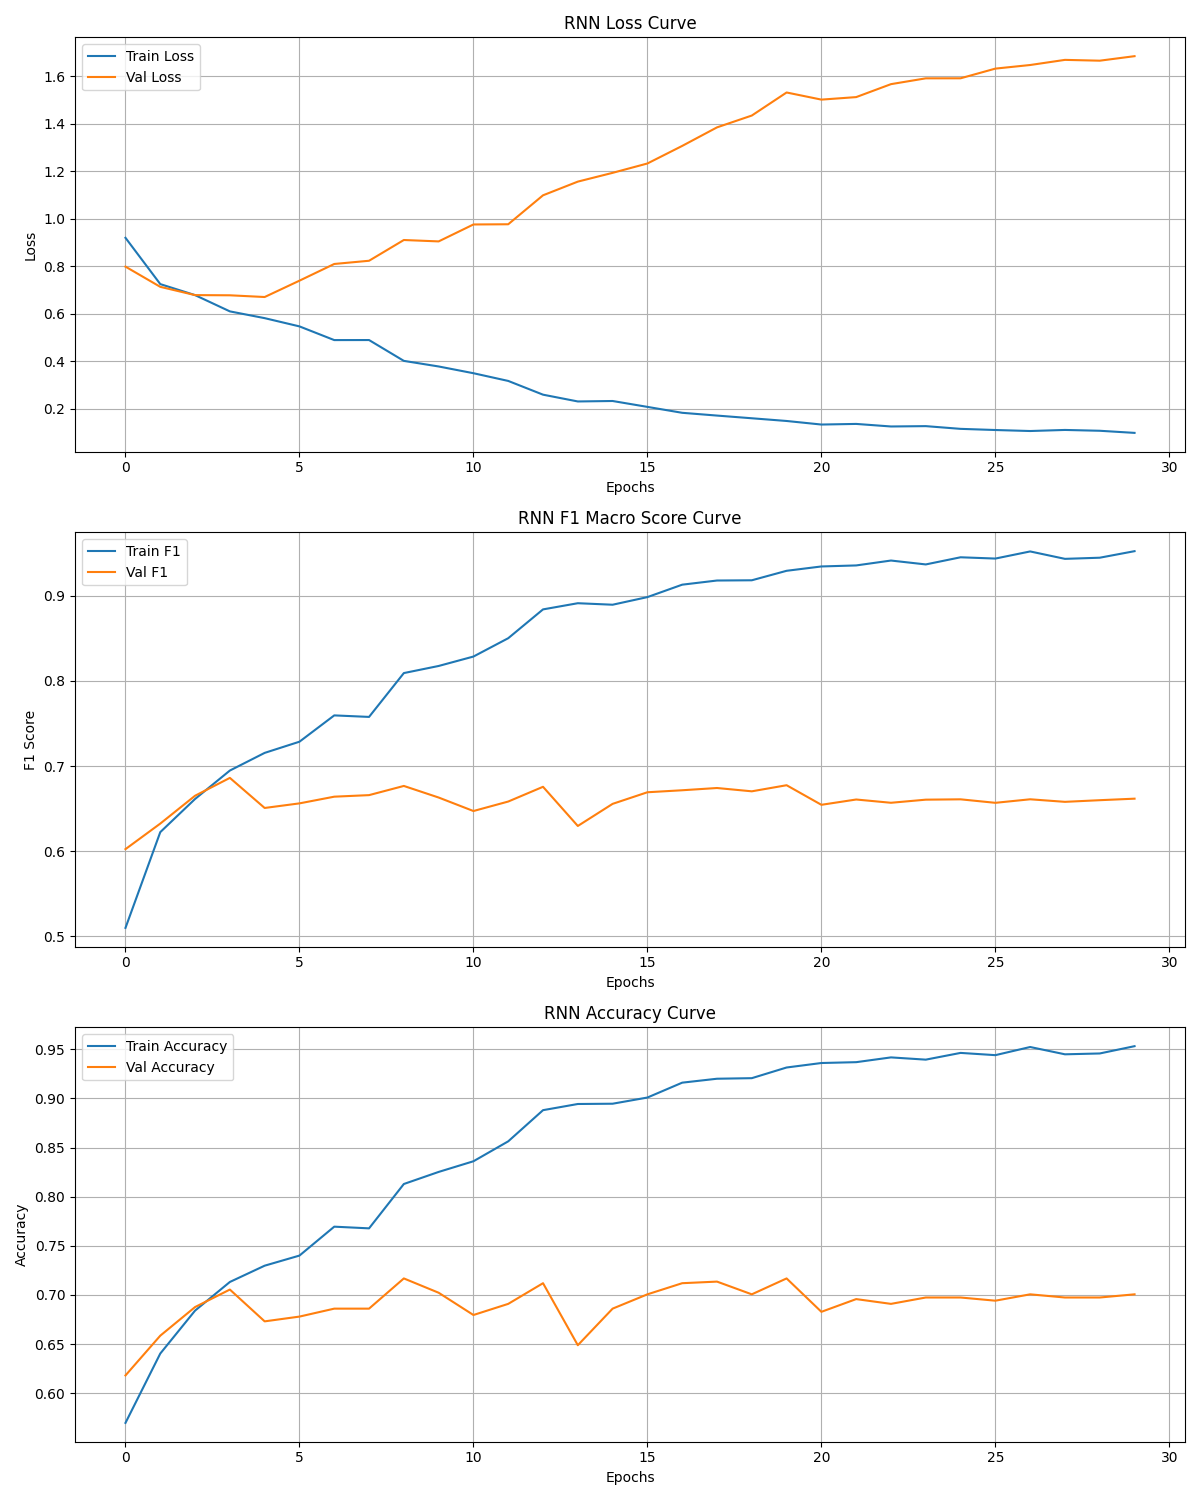

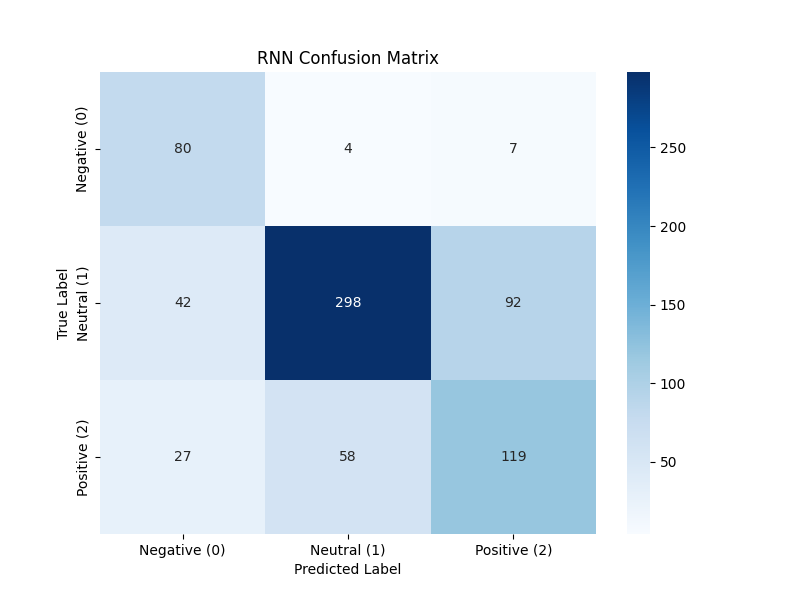

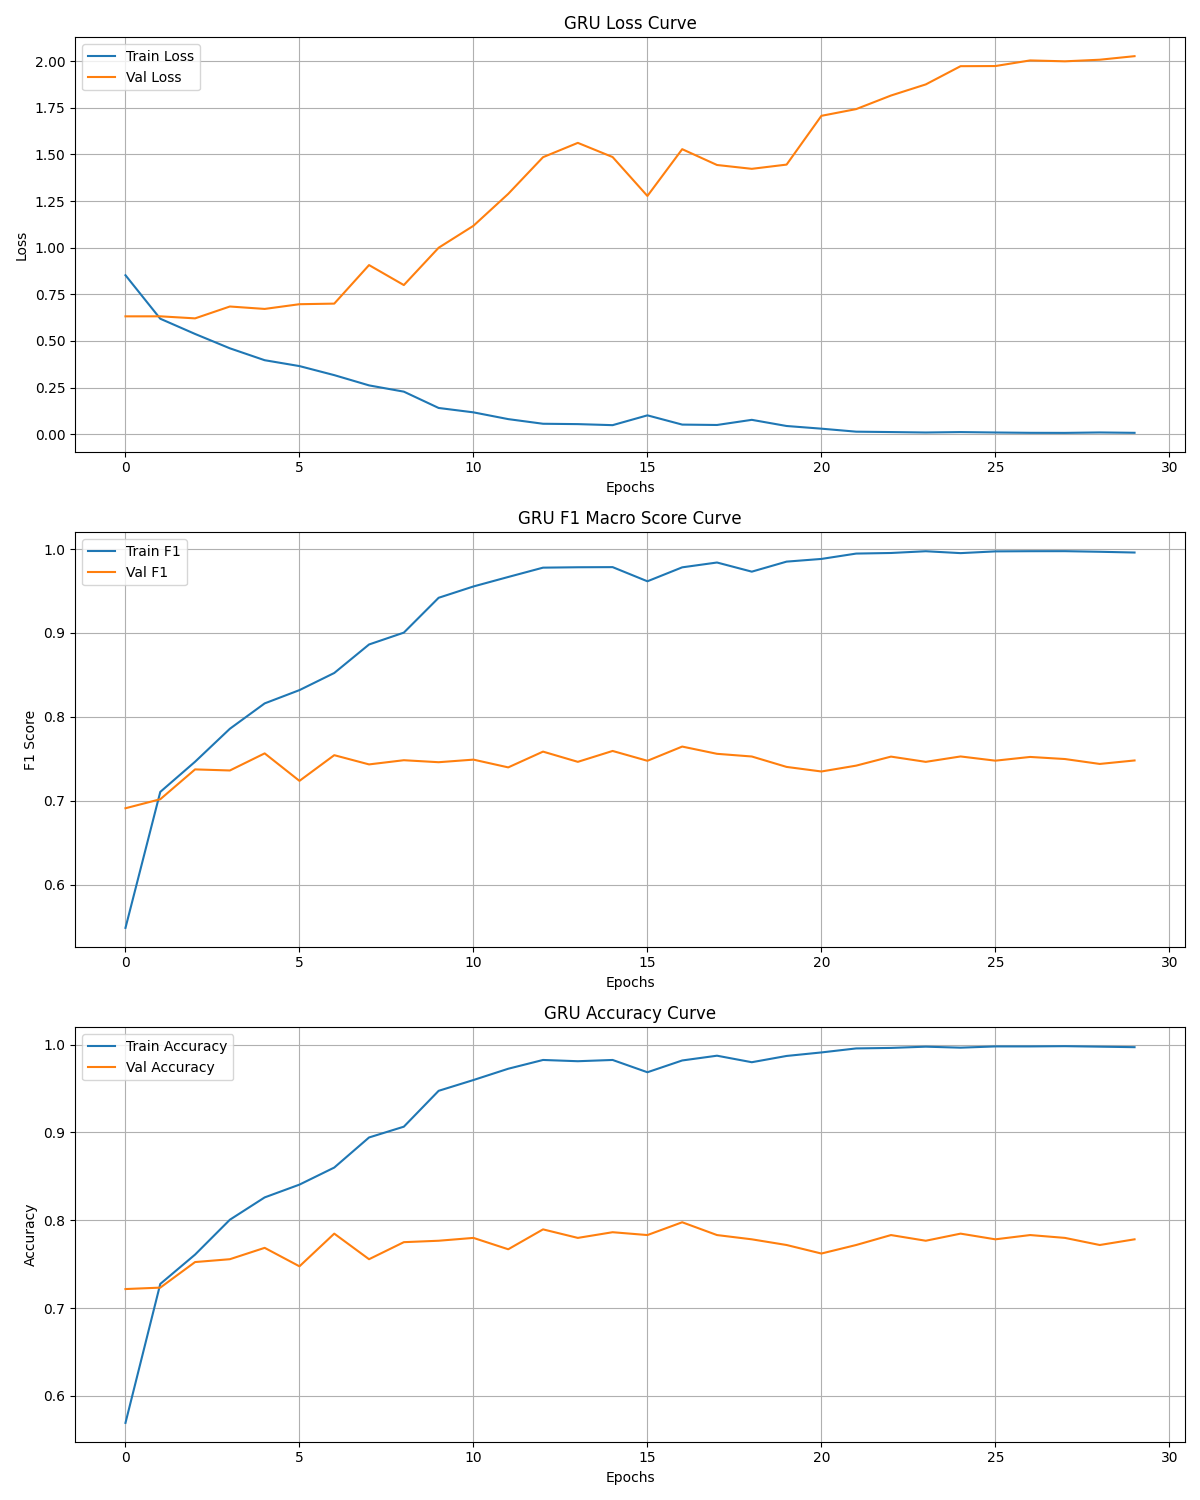

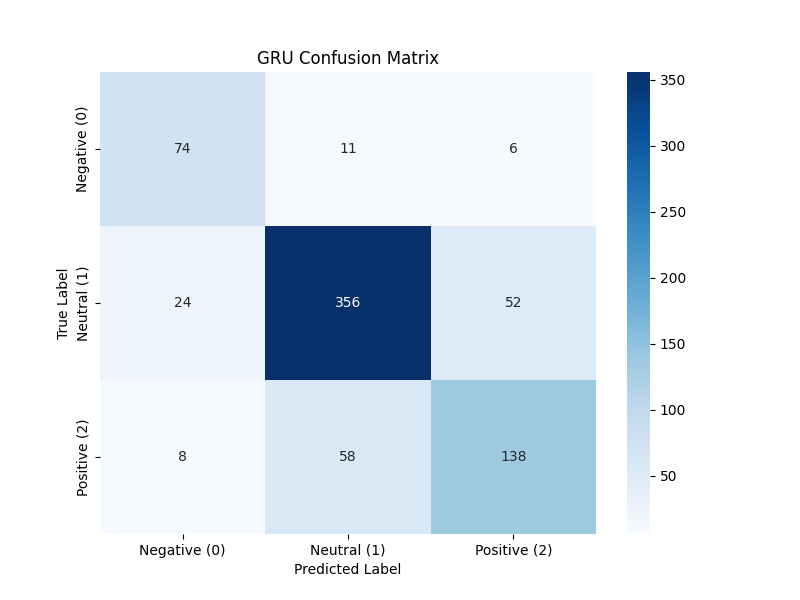

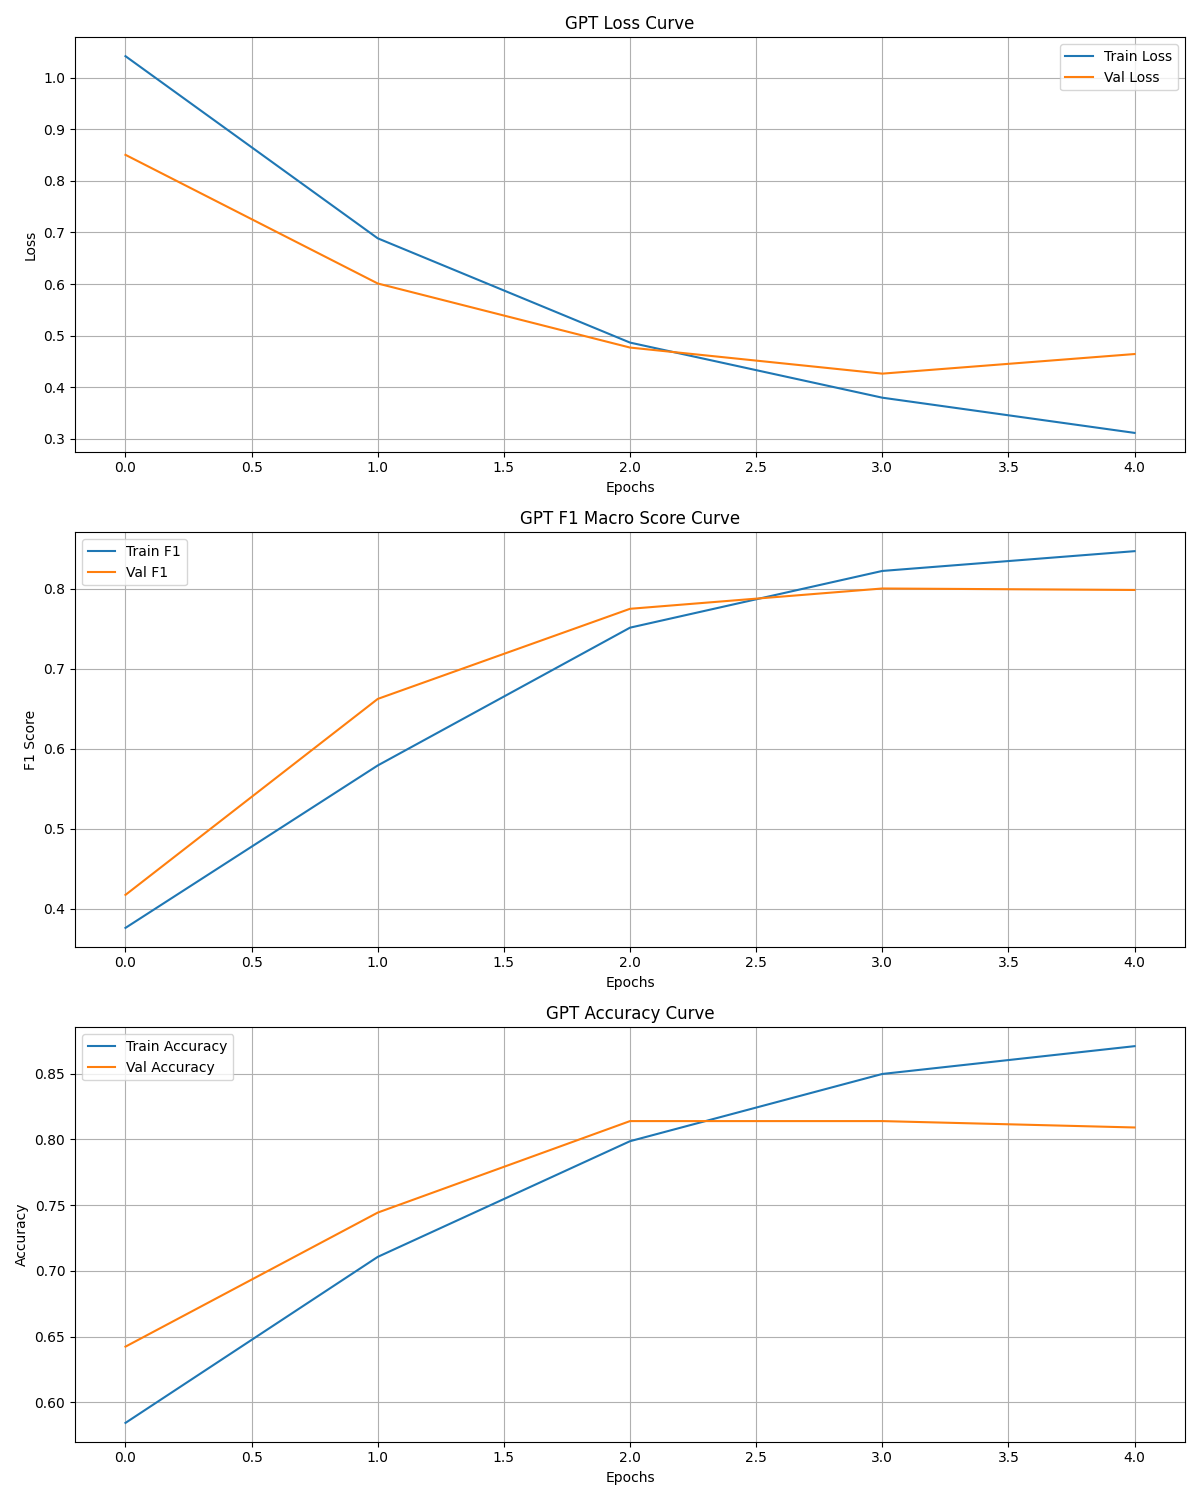

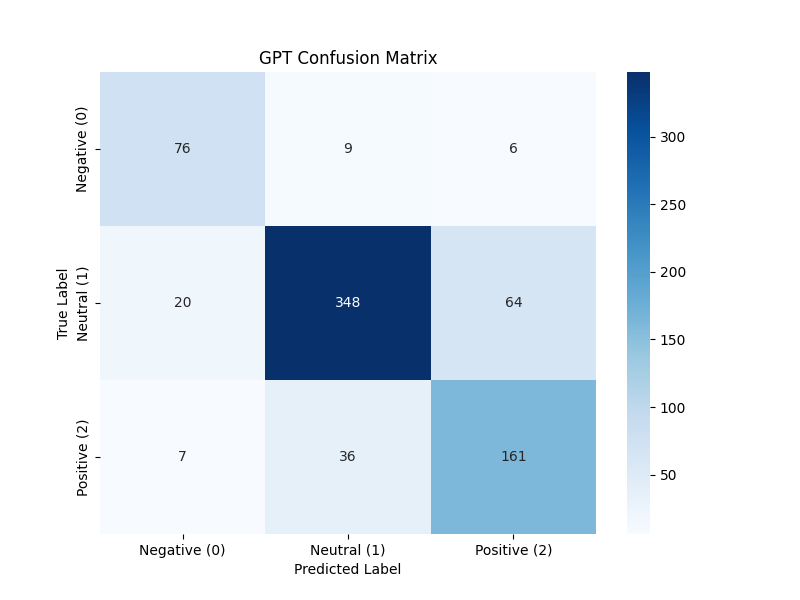

In [9]:
from IPython.display import Image, display

display(Image("outputs/mlp_learning_curves.png"))
display(Image("outputs/mlp_confusion_matrix.png"))

display(Image("outputs/lstm_learning_curves.png"))
display(Image("outputs/lstm_confusion_matrix.png"))

display(Image("outputs/bert_f1_learning_curves.png"))
display(Image("outputs/bert_confusion_matrix.png"))

display(Image("outputs/rnn_f1_learning_curves.png"))
display(Image("outputs/rnn_confusion_matrix.png"))

display(Image("outputs/gru_f1_learning_curves.png"))
display(Image("outputs/gru_confusion_matrix.png"))

display(Image("outputs/gpt_f1_learning_curves.png"))
display(Image("outputs/gpt_confusion_matrix.png"))



In [10]:
import pandas as pd

results = {
    "Model": ["MLP", "RNN", "LSTM", "GRU", "BERT", "GPT"],
    "Accuracy": [0.7400, 0.7029, 0.7565, 0.7868, 0.8212, 0.8129],  
    "Macro F1": [0.7061, 0.6852, 0.7220, 0.7540, 0.8071, 0.7924],
    "Weighted F1": [0.7452, 0.7096, 0.7546, 0.7863, 0.8235, 0.8154]
}

df_results = pd.DataFrame(results)
df_results

,Model,Accuracy,Macro F1,Weighted F1
0,MLP,0.7400,0.7061,0.7452
1,RNN,0.7029,0.6852,0.7096
2,LSTM,0.7565,0.7220,0.7546
3,GRU,0.7868,0.7540,0.7863
4,BERT,0.8212,0.8071,0.8235
5,GPT,0.8129,0.7924,0.8154


The mean-pooled FastText Embedding averages all word vectors into a 300-dimensional sentence embedding. The embeddings are averaged in similar ways and unable to capture the differences in semantic meanings in different contexts. In addition, a single vector is not able to show the dependencies between words. 

Compared to MLP, LSTM preserves word order, and this enables the model to capture the long-range dependencies between words.

Yes. Fine-tuned LLMs(BERT/GPT) outperform classical baselines. The fine-tuned LLMs are pretrained on massive data, so they have learnt general language structures. They are able to apply these understandings to our datasets, so they can give better results. In addition, the fine-tuned LLMs generate dynamic, contextual embeddings, and the representation of a word changes based on its surrounding words. 

Rank six models by test performance: BERT > GPT > GRU > LSTM > MLP > RNN.
Since BERT and GPT are find-tuned LLMs, they are pretrained on massive data and have dynamic embeddings. They give the best performance. Both GRU and LSTM preserve word order, and they can capture long-term dependencies between words. MLP relies on mean-pooled embeddings without sequence modeling, so it is weaker. RNN has limited performance is due to the vanishing gradient, and it cannot capture the long-term word dependencies. 

## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

#### <font color="red">I used Chat-GPT5.2 to (1).debug; (2). help improve MLP and LSTM F1 scores; (3). reformat my open question answers.  </font>